In [1]:
!pip install git+https://github.com/bao18/open_earth_map

  Cloning https://github.com/bao18/open_earth_map to /tmp/pip-req-build-rbw3nbd3
  Running command git clone --filter=blob:none --quiet https://github.com/bao18/open_earth_map /tmp/pip-req-build-rbw3nbd3
  Resolved https://github.com/bao18/open_earth_map to commit f16da336f8abf549e94a206ef67ab869654a557e
  Preparing metadata (setup.py) ... done
  Using cached gdown-5.2.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached einops-0.8.0-py3-none-any.whl.metadata (12 kB)
Using cached einops-0.8.0-py3-none-any.whl (43 kB)
Using cached gdown-5.2.0-py3-none-any.whl (18 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (63.0 MB)
  Created wheel for open_earth_map: filename=open_earth_map-0.1-py3-none-any.whl size=13734 sha256=da8048e72d7521b0b3bccb0a48782e148d07c074b5f326439e70af9f1ac8d3d1
  Stored in directory: /tmp/pip-ephem-wheel-cac

In [8]:
import os
# import gdown
import zipfile

with zipfile.ZipFile('OpenEarthMap.zip', 'r') as fzip:
    fzip.extractall()

In [3]:
import os
# import gdown
import zipfile

with zipfile.ZipFile('xBD.zip', 'r') as fzip:
    fzip.extractall()

In [1]:
import os
# import gdown
import zipfile

with zipfile.ZipFile('35_4_op_2024.zip', 'r') as fzip:
    fzip.extractall()

In [4]:
import time
import warnings
import numpy as np
import torch
import rasterio
import cv2
import open_earth_map as oem
import torchvision
from pathlib import Path
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

/opt/conda/lib/python3.11/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [9]:
!python3 compile_xbd.py

fullimgs:  1162 missing:  1162


In [15]:
import os

# Path to the OpenEarthMap directory
OEM_DATA_DIR = "OpenEarthMap/"

# Training and validation file list
TRAIN_LIST = os.path.join(OEM_DATA_DIR, "train.txt")
VAL_LIST = os.path.join(OEM_DATA_DIR, "val.txt")
TEST_LIST = os.path.join(OEM_DATA_DIR, "test.txt")

IMG_SIZE = 512
N_CLASSES = 9
LR = 0.0001
BATCH_SIZE = 4
NUM_EPOCHS = 10
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
OUTPUT_DIR = "outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [16]:
fns = [f for f in Path(OEM_DATA_DIR).rglob("*.tif") if "/images/" in str(f)]
train_fns = [str(f) for f in fns if f.name in np.loadtxt(TRAIN_LIST, dtype=str)]
val_fns = [str(f) for f in fns if f.name in np.loadtxt(VAL_LIST, dtype=str)]
test_fns = [str(f) for f in fns if f.name in np.loadtxt(TEST_LIST, dtype=str)]

print("Total samples      :", len(fns))
print("Training samples   :", len(train_fns))
print("Validation samples :", len(val_fns))
print("Test samples       :", len(test_fns))

Total samples      : 5004
Training samples   : 3000
Validation samples : 500
Test samples       : 1500


In [15]:
train_augm = torchvision.transforms.Compose(
    [
        oem.transforms.Rotate(),
        oem.transforms.Crop(IMG_SIZE),
    ],
)

val_augm = torchvision.transforms.Compose(
    [
        oem.transforms.Resize(IMG_SIZE),
    ],
)

In [16]:
train_data = oem.dataset.OpenEarthMapDataset(
    train_fns,
    n_classes=N_CLASSES,
    augm=train_augm,
)

val_data = oem.dataset.OpenEarthMapDataset(
    val_fns,
    n_classes=N_CLASSES,
    augm=val_augm,
)

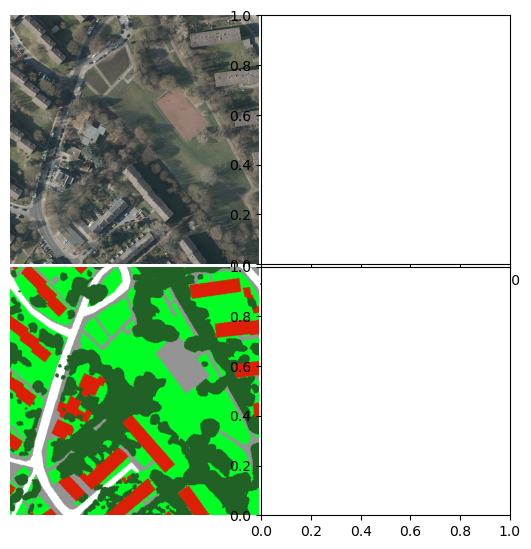

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(2*2.5, 2*2.5))
fig.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.01, wspace=0.01)

IDX = 2
for i in range(1):
    img, msk, fn = train_data[IDX]

    img = np.moveaxis(img.numpy(), 0, -1)
    msk = oem.utils.make_rgb(np.argmax(msk.numpy(), axis=0))

    axs[0, i].imshow(img)
    axs[0, i].axis("off")
    axs[1, i].imshow(msk)
    axs[1, i].axis("off")

plt.show()

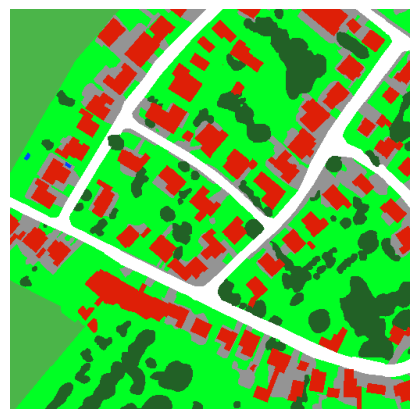

In [18]:
img, msk, fn = train_data[4]

img = np.moveaxis(img.numpy(), 0, -1)
msk = oem.utils.make_rgb(np.argmax(msk.numpy(), axis=0))

#plt.imshow(msk)
#plt.axis('off')
#plt.savefig('label-expample.png')

fig = plt.figure(frameon=False)
fig.set_size_inches(4,4)

ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(msk, aspect='auto')
fig.savefig('example.png')